# 2

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
data = load_iris()['data']
dataClass = load_iris()['target']
acc = []
for i in range(10):
    trainData,testData,trainClass,testClass, = train_test_split(data,dataClass,test_size=0.3)
    fa = FactorAnalysis(n_components=3)
    fa.fit(trainData)
    trainData = fa.transform(trainData)
    testData = fa.transform(testData)
    knn = KNeighborsClassifier()
    knn.fit(trainData,trainClass)
    acc.append(knn.score(testData,testClass))
np.mean(acc)

# 5

In [44]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
data =load_iris()['data'] #花的屬性
target = load_iris()['target'] # 花的類別
wRow = 39
wCol = 39
dim = 4
def d(v1,v2):
    return np.linalg.norm(v1 - v2)

w = np.random.random_sample(size=(wRow,wCol,dim))
# λ = NumIteration/MapRadius
Lambda = 5000 / (39*np.sqrt(2))
# γ（0） = 0.05 => σ0
sigma0 = np.sqrt( (-1 *d(np.array([0,0]),np.array([19,19]))**2)  / (np.log(0.05) * 2))
# η（0） = 0.1  => η0
eta0 = 0.1 / np.exp( 0 / Lambda )

def closestNode(data):
    result = (0,0)
    smallD = 1.0e20
    for i in range(wRow):
        for j in range(wCol):
            if d(w[i][j] , data) < smallD:    
                smallD = d(w[i][j] , data)
                result =( i , j )
    return result

# η( t ) = η0 * exp( -t / λ )
def getEta(t):
    return eta0 * np.exp( -t / Lambda)

#σ( t ) = σ0 * exp( -t / λ )
def getSigma(t):
    return sigma0 * np.exp( -t /Lambda)

#γ( t ) = exp(  (-|| ( i , j )  - ( i0 , j0 )  ||^2 )  /  2 (σ( t )^2) )
def getGamma(t,v1,v2):
    return np.exp(  -1 * (d(v1,v2)**2)  / ((getSigma(t) ** 2) *2))

def common(data,n):
    if len(data) == 0 :
        return -1
    count = np.zeros(shape=n, dtype=np.int)
    for i in range(len(data)):
        count[data[i]] += 1
    return np.argmax(count) 

In [10]:
print('λ：',Lambda)
print('η0：',eta0)
print('σ0：',sigma0)

λ： 90.65471553673686
η0： 0.1
σ0： 10.977466030510666


In [55]:
for times in range(5000):
    if times%1000==0:
        print(times)
    index = np.random.randint(len(data)) # Get a training sample index
    (i0,j0) = closestNode(data[index]) #BMU
    for i in range(wRow):
        for j in range(wCol): 
                w[i][j] = w[i][j] + getEta(times) * getGamma(times,np.array([i0,j0]),np.array([i,j])) * (data[index]-w[i][j])

0
1000
2000
3000
4000


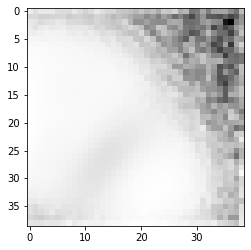

In [56]:
# U-matrix
u = np.zeros(shape=(wRow,wCol),dtype=np.float64)
for i in range(wRow):
    for j in range(wCol):
        v=w[i][j]
        total = 0.0
        count =0
        if i-1 >= 0:
            total += d(v,w[i-1][j])
            count+=1
        if i+1 < wRow:
            total += d(v,w[i+1][j])
            count+=1
        if j-1 >= 0:
            total += d(v,w[i][j-1])
            count+=1
        if j+1 < wCol:
            total += d(v,w[i][j+1])
            count+=1
        u[i][j] = total
plt.imshow(u, cmap="Greys")
plt.show()

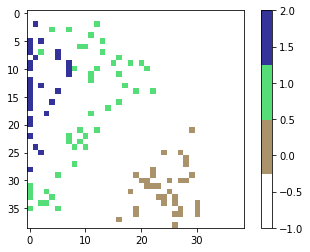

In [57]:
m = np.empty( shape=(wRow,wCol),dtype = object )
label = np.zeros(shape=(wRow,wCol), dtype=np.int)
for i in range(wRow):
    for j in range(wCol):
        m[i][j] = [  ]
for i in range(len(data)):
    (i0,j0) =closestNode(data[i])
    m[i0][j0].append(target[i])
for i in range(wRow):
    for j in range(wCol):
        label[i][j] =common(m[i][j],3)
plt.imshow(label, cmap=plt.cm.get_cmap('terrain_r', 4))
plt.colorbar()
plt.show()